In [1]:
import pandas as pd
data= pd.read_csv("thanksgiving.csv", encoding="Latin-1")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [2]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [3]:
data["Do you celebrate Thanksgiving?"].value_counts()


Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [4]:
data = data[data["Do you celebrate Thanksgiving?"]=='Yes']
data["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64

In [5]:
data["What is typically the main dish at your Thanksgiving dinner?"].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

In [6]:
tofurkey = data[data["What is typically the main dish at your Thanksgiving dinner?"]=='Tofurkey']
tofurkey["Do you typically have gravy?"]


4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
393    Yes
399    Yes
571    Yes
594    Yes
628     No
774     No
820     No
837    Yes
860     No
953    Yes
Name: Do you typically have gravy?, dtype: object

In [7]:
des_apple = "Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"
des_pumpkin = "Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"
des_pecan = "Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"

apple_isnull = data[des_apple].isnull()
pumpkin_isnull = data[des_pumpkin].isnull()
pecan_isnull = data[des_pecan].isnull()

ate_pies = apple_isnull & pumpkin_isnull & pecan_isnull
ate_pies.value_counts()

False    876
True     104
dtype: int64

In [8]:
import re

def age_isnull(x):
    if pd.isnull(x):
        return None
    else:
        return int(re.match(r'[0-9]+',x).group())
data["int_age"] = data["Age"].apply(age_isnull)

print("Description: \n", data["int_age"].describe())
print("Count of Values: \n", data["int_age"].value_counts())

Description: 
 count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: int_age, dtype: float64
Count of Values: 
 45.0    269
60.0    258
30.0    235
18.0    185
Name: int_age, dtype: int64


### Findings
- Age is a categorical set of data and is not a true representation of what age the survey reached. It could be used to gain insight on a broad spectrum of who was reached by the amount in each category.
- Interesting to see the category of 18-29 year olds was lower then usual. Where they not targeted or is this age less willing to take surveys?

In [9]:
def wage_isnull(x):
    if pd.isnull(x):
        return None
    elif re.match(r'^Pre',x):
        return None
    else:
        wage_searchlist = re.findall(r'\d*',x)
        return int(wage_searchlist[1] + wage_searchlist[3])
wage_name="How much total combined money did all members of your HOUSEHOLD earn last year?"
data["int_income"]=data[wage_name].apply(wage_isnull)
print(data["int_income"].value_counts(ascending=True))
print(data["int_income"].describe())

175000.0     26
150000.0     38
125000.0     48
0.0          52
10000.0      60
200000.0     76
100000.0    109
50000.0     127
75000.0     127
25000.0     166
Name: int_income, dtype: int64
count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64


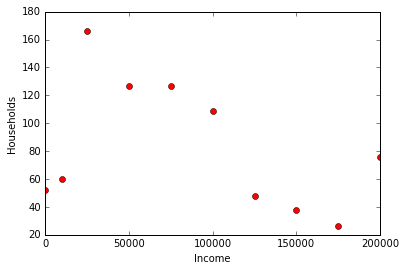

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data["int_income"].value_counts(), 'ro')
plt.ylabel("Households")
plt.xlabel("Income")
plt.show()

### Findings
- Something to note, this plot is not a true representation as it is based on a category not true income. However, it more of a representation then age as it has 10 categories. 
- While exploring the household income I noticed an interesting spike in the \$25,000 range. I did some digging and found [this link](http://visualizingeconomics.com/blog/2006/11/05/2005-us-income-distribution) of a graph representation of the income distribution in 2005 and found the same pattern in this graph.
- The only thing that is off is the \$200,000+ category. Interested in exploring this more.

In [11]:
under_15=data[data["int_income"] < 150000]["How far will you travel for Thanksgiving?"].value_counts()
under_15

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64

In [12]:
over_15=data[data["int_income"] >= 150000]["How far will you travel for Thanksgiving?"].value_counts()
over_15

Thanksgiving is happening at my home--I won't travel at all                         66
Thanksgiving is local--it will take place in the town I live in                     34
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    25
Thanksgiving is out of town and far away--I have to drive several hours or fly      15
Name: How far will you travel for Thanksgiving?, dtype: int64

In [14]:
import numpy as np
under15_travel_perc = np.sum(under_15[1:]) / np.sum(under_15)
over15_travel_perc = np.sum(over_15[1:]) / np.sum(over_15)
print("Under 150,000 HHI percent traveled:",under15_travel_perc)
print("Over 150,000 HHI percent traveled:",over15_travel_perc)

Under 150,000 HHI percent traveled: 0.592162554427
Over 150,000 HHI percent traveled: 0.528571428571


In [ ]:
pd.pivot_table(data,values='int_age',columns='Have you ever attended a "Friendsgiving?"',index="Have you ever tried to meet up with hometown friends on Thanksgiving night?")

In [ ]:
pd.pivot_table(data,values="int_income" ,index="Have you ever tried to meet up with hometown friends on Thanksgiving night?" , columns='Have you ever attended a "Friendsgiving?"' )

### Findings
- I found it interesting that by just 7% those with a Household income of over \$150,000 were more lickly to stay home for thanksgiving. 
- I also found it interesting that on average, younger people had spent thanksgiving with friends.
- This also holds true for those with lower household income. Those with lower income were more lickly to have thanksgiving at a friends house.